In [11]:
import os
import glob
import torch
import torchvision
from torchvision import transforms
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from sklearn.decomposition import PCA

## Importing Cat and dog Dataset 

In [7]:
image_transform = transforms.Compose([transforms.Resize((518,518)),
                                     transforms.ToTensor()])
train_dataset = torchvision.datasets.ImageFolder("dataset/cat_dog/train_set", 
                               transform=image_transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=32,
                                         shuffle=True,
                                          pin_memory=True)

test_dataset = torchvision.datasets.ImageFolder("dataset/cat_dog/test_set", 
                               transform=image_transform)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=32,
                                         shuffle=True,
                                          pin_memory=True)

## Load a pretrained dino model

In [8]:
dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')

Using cache found in /Users/daikeig/.cache/torch/hub/facebookresearch_dinov2_main


## Visualizing the attention

In [9]:
def vis_attention(image):
    plt.imshow(np.transpose(image, axes=[1,2,0]))
    plt.show()
    _, h, w = image.shape
    with torch.no_grad():
        feature = dinov2_vitl14.forward_features(image.unsqueeze(0))['x_norm_patchtokens'][0]
    pca_feature = PCA(n_components=3).fit_transform(feature.numpy())
    square_shape = int(np.sqrt(pca_feature[:,0].shape))
    plt.imshow(pca_feature[:,0].reshape((square_shape,square_shape)))
    return pca_feature

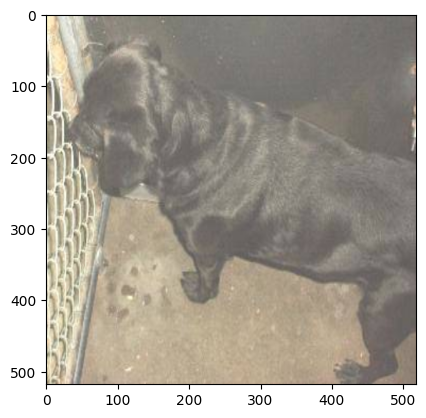

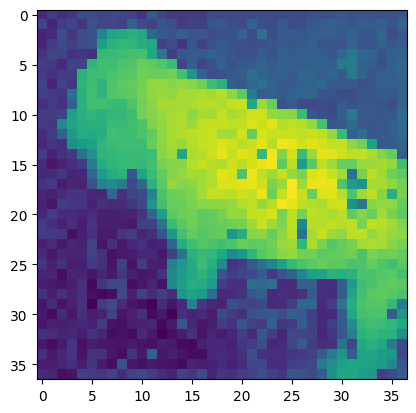

In [12]:
sample_image, clss = next(iter(train_loader))
attention = vis_attention(sample_image[0])